### Imports

In [6]:
import sys
from pathlib import Path
import os, glob
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd
import shutil


### Load data attributes into dataframe

Load data attributes into dataframe.  
Makes it easier to select our desired data for viewing  

In [7]:
# data_path = Path('/home/user/hackathon/data')
# test_image_paths = glob.glob('./data/cropped/test/**/*.tif', recursive=True)
# train_image_paths = glob.glob('./data/cropped/train/**/*.tif', recursive=True)
all_image_paths = glob.glob('./data/cropped/**/*.tif', recursive=True) #TODO: read path from config

In [101]:
data_list = []
for path in all_image_paths:
    # print(path)
    path_parts = path.split('/')
    mode = path_parts[3]
    year = path_parts[4]
    date = path_parts[5]
    sample_id = path_parts[6]
    filename = path_parts[7]
    filepath = path
    lab = filename.split('_')[0]
    band = filename.split('_')[-1].split('.')[0]
    # print(path_parts)
    # print(mode, year, date, sample_id, filename, filepath, lab)
    
    data_list.append((mode, year, date, sample_id, band, filename, filepath, lab))
    

In [102]:
df = pd.DataFrame(data_list, columns =['mode', 'year', 'date', 'sample_id', 'band', 'filename', 'filepath', 'lab'])

In [103]:
df.head()

,mode,year,date,sample_id,band,filename,filepath,lab
0,test,2021,20210913,49,B11,X_47PQS_20210913_B11.tif,./data/cropped/test/2021/20210913/49/X_47PQS_2...,X
1,test,2021,20210913,49,B05,X_47PQS_20210913_B05.tif,./data/cropped/test/2021/20210913/49/X_47PQS_2...,X
2,test,2021,20210913,49,TCI,X_47PQS_20210913_TCI.tif,./data/cropped/test/2021/20210913/49/X_47PQS_2...,X
3,test,2021,20210913,49,B06,X_47PQS_20210913_B06.tif,./data/cropped/test/2021/20210913/49/X_47PQS_2...,X
4,test,2021,20210913,49,B03,X_47PQS_20210913_B03.tif,./data/cropped/test/2021/20210913/49/X_47PQS_2...,X


### View all bands

In [104]:
unq_bands = np.sort(df.band.unique())
print(f'number of bands: {len(unq_bands)}')
print(unq_bands)
    


number of bands: 15
['AOT' 'B01' 'B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B11' 'B12' 'B8A'
 'SCL' 'TCI' 'WVP']


### View all labels

In [137]:
dat = np.sort(df.lab.unique())
print(f'number of labels: {len(dat)}')
print(dat)
    


number of labels: 5
['1' '2' '3' '4' 'X']


let's inspect the number of samples for each label

In [147]:
val_counts = df[df['band']=='TCI'].lab.value_counts() #use only 1 band or else each sample gets multiplied with one band
val_counts

X    40115
1    36210
3    30743
2    17040
4     9514
Name: lab, dtype: int64

let's plot that

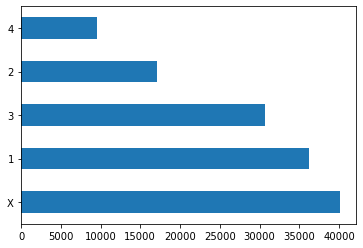

In [148]:

val_counts.plot(kind='barh')
plt.show()

### View number of samples


In [150]:
dat = np.sort(df.sample_id.unique())
print(f'number of samples: {len(dat)}')
print(dat)
    


number of samples: 1317
['0' '1' '10' ... '997' '998' '999']


HUHHH???   
... anyway...

### Create subset (sample) of data

In [167]:
subset = df[((df['date'].str.contains('202101'))|(df['date'].str.contains('202102')))
            &
            (df['sample_id'].astype(int) < 20)]
print(subset.shape)
subset.head()


(6600, 8)


,mode,year,date,sample_id,band,filename,filepath,lab
9135,test,2021,20210225,4,B06,X_47PQS_20210225_B06.tif,./data/cropped/test/2021/20210225/4/X_47PQS_20...,X
9136,test,2021,20210225,4,B04,X_47PQS_20210225_B04.tif,./data/cropped/test/2021/20210225/4/X_47PQS_20...,X
9137,test,2021,20210225,4,B07,X_47PQS_20210225_B07.tif,./data/cropped/test/2021/20210225/4/X_47PQS_20...,X
9138,test,2021,20210225,4,B12,X_47PQS_20210225_B12.tif,./data/cropped/test/2021/20210225/4/X_47PQS_20...,X
9139,test,2021,20210225,4,B02,X_47PQS_20210225_B02.tif,./data/cropped/test/2021/20210225/4/X_47PQS_20...,X


In [168]:

for idx, row in subset.iterrows():
    source_filepath = row.filepath
    dest_filepath = source_filepath.replace('cropped', 'cropped_subset')
    # print(source_filepath, os.path.basename(dest_filepath))
    os.makedirs(os.path.dirname(dest_filepath), exist_ok = True) 
    shutil.copy(source_filepath, dest_filepath)


### compare samples between classes

In [119]:
samples_class_1 = df[(df['band']=='TCI')&(df['lab']=='1')].iloc[0:5]
samples_class_2 = df[(df['band']=='TCI')&(df['lab']=='2')].iloc[0:5]
samples_class_3 = df[(df['band']=='TCI')&(df['lab']=='3')].iloc[0:5]
samples_class_4 = df[(df['band']=='TCI')&(df['lab']=='4')].iloc[0:5]


In [130]:
def view_sample(row):
    image = cv2.imread(row.filepath)
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.show()

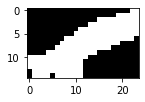

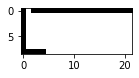

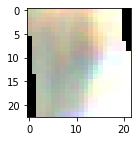

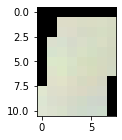

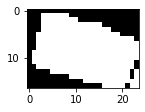

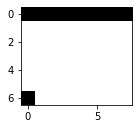

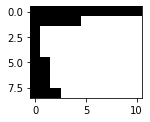

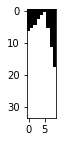

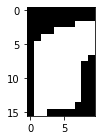

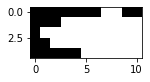

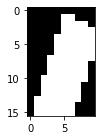

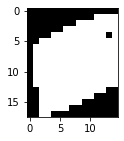

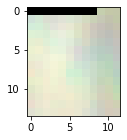

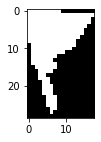

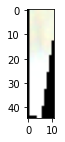

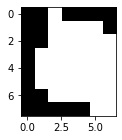

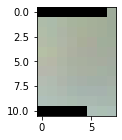

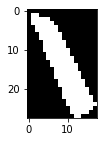

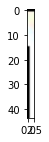

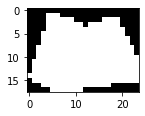

In [133]:
for sample_class in [samples_class_1, samples_class_2, samples_class_3, samples_class_4]:
    for index, row in sample_class.iterrows():
        view_sample(row)
    
    

## Messy code below

In [29]:
#select train/test
modes = os.listdir(os.path.join(data_path, 'cropped'))
print(modes)
mode = 'train'


['test', 'train']


In [36]:
#list down sample names/ids
samples = os.listdir(os.path.join(data_path, 'cropped', mode, '2021', '20210106'))
print(samples[:5])

['1300', '1031', '49', '181', '573']


In [37]:
sample = samples[0]

In [27]:
modes

['test', 'train']

In [10]:
os.path.join(data_path, 'cropped/train/**/*.tif')

'//wsl$/Ubuntu/home/user/hackathon/data/cropped/train/**/*.tif'

In [11]:
os.getcwd()

'/home/user/hackathon'

In [20]:
image = cv2.imread(train_image_paths[4])

In [22]:
image.shape

(16, 10, 3)